In [1]:
#This data set is from the US Census Current Population Survey (CPS) March 2014 Supplement
#Data was fetched using DataFerrett

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file = 'C:\\Users\\Abe\\Data Science Bootcamp\\CPS Data\\CPS_03.06.17.csv'
df = pd.read_csv(file)

print(df.head())

   OCCURNUM         H_IDNUM1  H_IDNUM2  PHF_SEQ  YYYYMM     AGI  A_AGE  A_SEX  \
0        41  394650059270622     93001        1  201403  170456     73      1   
1        42  394650059270622     93001        1  201403       0     72      2   
2        43  394650059270622     93001        2  201403   29003     34      2   
3        41  903349510126203     93001        1  201403    9294     41      2   
4        43  903349510126203     93001        2  201403   35000     43      1   

   A_FTLF  
0       1  
1       1  
2       1  
3       1  
4       1  


In [2]:
#Drop the first 5 columns and rename the remaining for better readability

df.drop(df.columns[[0,1,2,3,4]], axis=1, inplace=True)
df.rename(columns={'AGI': 'Income', 'A_AGE': 'Age','A_SEX': 'Sex','A_FTLF': 'Full Time'}, inplace=True)
print(df.head())

   Income  Age  Sex  Full Time
0  170456   73    1          1
1       0   72    2          1
2   29003   34    2          1
3    9294   41    2          1
4   35000   43    1          1


In [3]:
#Replace values so they are more readable

df.loc[df['Sex'] == 1, 'Sex'] = 'M'
df.loc[df['Sex'] == 2, 'Sex'] = 'F'
df.loc[df['Full Time'] == 1, 'Full Time'] = 'Yes'
df.loc[df['Full Time'] == 0, 'Full Time'] = 'No'
print(df.head())

   Income  Age Sex Full Time
0  170456   73   M       Yes
1       0   72   F       Yes
2   29003   34   F       Yes
3    9294   41   F       Yes
4   35000   43   M       Yes


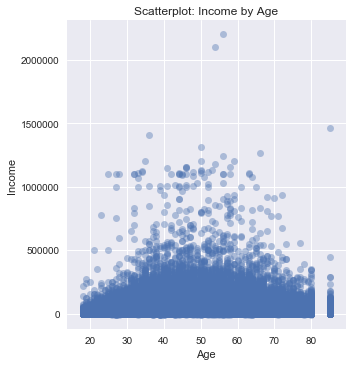

In [4]:
#Let's see what a scatter of Income on Age looks like...

g = sns.lmplot(y='Income',
               x='Age',
               data=df, 
               fit_reg=False, 
               scatter_kws={'alpha':0.4})
g.set_ylabels("Income")
g.set_xlabels("Age")
sns.plt.title('Scatterplot: Income by Age')
plt.show()

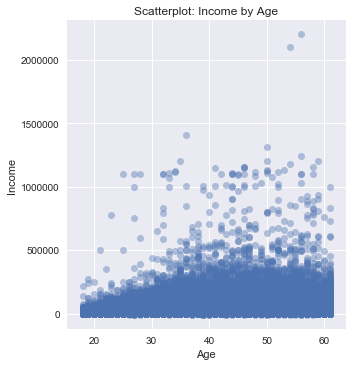

In [5]:
#Lot's of data, really hard to see what's going on. 
#Looks like as people get older they are more likely to acheive a higher income up till about 47
#Let's reduce the ages to people less than 62 and check if it makes the trend clearer

df_62 = df.loc[df['Age'] < 62]

g = sns.lmplot(y='Income',
               x='Age',
               data=df_62, 
               fit_reg=False, 
               scatter_kws={'alpha':0.4})
g.set_ylabels("Income")
g.set_xlabels("Age")
sns.plt.title('Scatterplot: Income by Age')
plt.show()

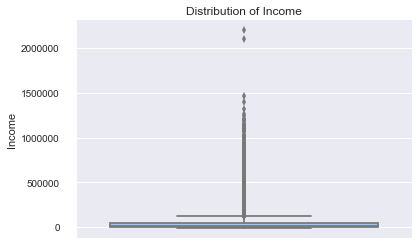

In [6]:
#A little clearer here but hard to come to a definitive conclusion
#Let's take a look at the distibutions for income and see if there's anything we can work with

ax = sns.boxplot(y='Income',data=df,palette='pastel')  
sns.plt.title('Distribution of Income')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Income')
plt.show()

In [7]:
#Wow, lots of outliers. Let's see what the intervals are

print(df['Income'].describe([.25, .5, .75, .8, .9, .95, .99, .999]))

count    1.006330e+05
mean     3.481805e+04
std      6.587707e+04
min     -9.999000e+03
25%      0.000000e+00
50%      9.000000e+03
75%      4.708000e+04
80%      6.000000e+04
90%      1.000000e+05
95%      1.403560e+05
99%      2.669241e+05
99.9%    7.902122e+05
max      2.199998e+06
Name: Income, dtype: float64


[<matplotlib.text.Text at 0x88d89b0>, <matplotlib.text.Text at 0x86457d0>]

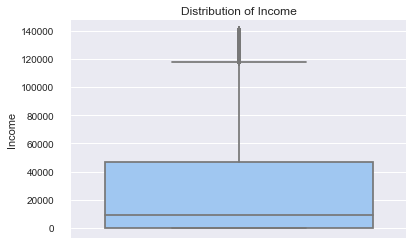

In [9]:
#Let's do some data cleansing and emove the outliers by "winsorizing"
#Convert all values above 95% to the 95% value which is 140,356

df_inc = df.copy(deep=True)

df_inc.loc[df_inc['Income'] > 140356, 'Income'] = 140356
df_inc.loc[df_inc['Income'] < 0, 'Income'] = 0

ax = sns.boxplot(y='Income',data=df_inc,palette='pastel')  
sns.plt.title('Distribution of Income')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Income')

In [10]:
#Looks like the median dropped from above 30,000 to less than 20,000 after removing the outliers
#Let's see what it really is

print(df_inc["Income"].describe())

count    100633.000000
mean      30130.614331
std       41537.295904
min           0.000000
25%           0.000000
50%        9000.000000
75%       47080.000000
max      140356.000000
Name: Income, dtype: float64


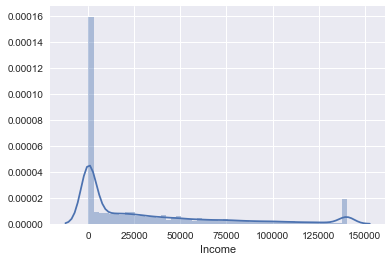

In [11]:
#Income is definitely not normally distributed since the mean and median are so different
#Let's take a look at this as a histogram

sns.distplot(df_inc['Income'])

   Income  Age Sex Full Time
0  140356   73   M       Yes
2   29003   34   F       Yes
3    9294   41   F       Yes
4   35000   43   M       Yes
8   85002   47   M       Yes


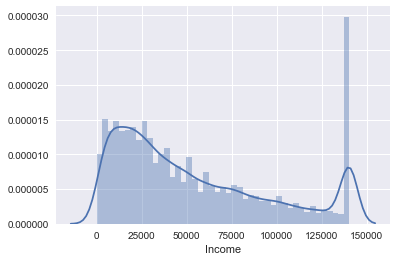

In [12]:
#A lot of people with 0 income.
#Let's remove people with 0 income and re-run

df_inc = df_inc.drop(df_inc[df_inc.Income <= 0].index)
print(df_inc.head())

sns.distplot(df_inc['Income'])


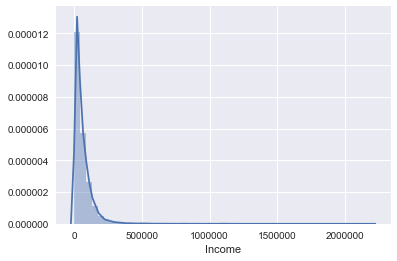

In [18]:
#There are a lot of instances of the max income
#Let's take a look at the histogram w/o a cap on income

df_inc2 = df.drop(df[df.Income <= 0].index)

sns.distplot(df_inc2["Income"])

[<matplotlib.text.Text at 0x8947bb0>, <matplotlib.text.Text at 0xe91970>]

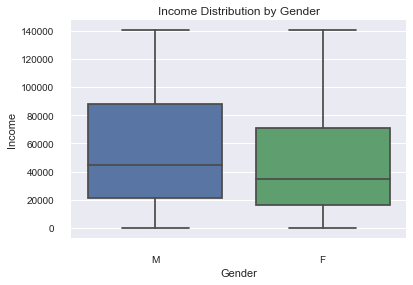

In [25]:
#Create two boxplots by gender to see the distribution for each

ax = sns.boxplot(x='Sex', y='Income',data=df_inc)  
sns.plt.title('Income Distribution by Gender')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Gender', ylabel='Income')

[<matplotlib.text.Text at 0x89615b0>, <matplotlib.text.Text at 0x10f8b30>]

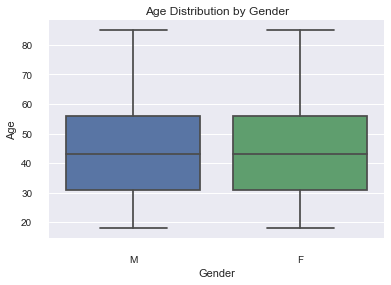

In [26]:
#Average Age by Gender for people with income

ax = sns.boxplot(x='Sex', y='Age',data=df_inc)  
sns.plt.title('Age Distribution by Gender')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Gender', ylabel='Age')

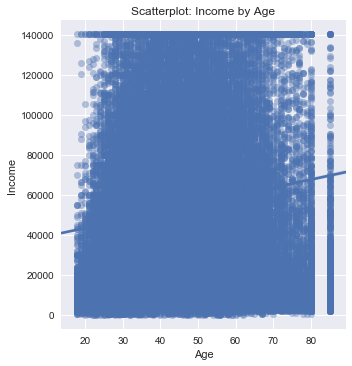

In [30]:
#Create a scatterplot with the new data fram inc_100 
#This df only includes people who have income and has capped the highest income level to 140,356

g = sns.lmplot(y='Income',
               x='Age',
               data=df_inc, 
               fit_reg=True, 
               scatter_kws={'alpha':0.4})
g.set_ylabels("Income")
g.set_xlabels("Age")
sns.plt.title('Scatterplot: Income by Age')